# MobileNetV2

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path_dir = '/content/drive/My Drive/Hoc/CS114/Dataset/Food-11/img'
os.chdir(path_dir)
evaluation_dir = path_dir + '/evaluation/'
training_dir = path_dir + '/training/'
validation_dir = path_dir + '/validation/'
class_names = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']

In [ ]:
def load_data(path):
  X, Y = [], []
  for folder_name in class_names:
    folder_path = os.path.join(path, folder_name)
    i=0
    for fname in os.listdir(folder_path):
      if(i<700): #Google colab limitation
        fpath = os.path.join(folder_path, fname)
        img = image.load_img(fpath, target_size=(224,224))
        img_data = image.img_to_array(img)
        X.append(img_data)
        Y.append(folder_name)
        i=i+1
  
  # Preprocessing
  X = np.asarray(X)/255.0
  Y = np.asarray(Y)

  print('Loading completed. ')
  return X, Y

In [ ]:
X_train, Y_train = load_data(training_dir)

Loading completed. 


In [ ]:
X_test, Y_test = load_data(evaluation_dir)

Loading completed. 


In [ ]:
X_valid, Y_valid = load_data(validation_dir)

Loading completed. 


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_valid = lb.fit_transform(Y_valid)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18,zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
opt = Adam(learning_rate=0.01)
epochs = 20
batch_size = 64

In [ ]:
def get_model():
  gmodel = Sequential()
  mobileV2 = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False, weights='imagenet')
  mobileV2.trainable = False
  gmodel.add(mobileV2)
  gmodel.add(GlobalAveragePooling2D())
  gmodel.add(Dense(len(class_names)))
  gmodel.add(Activation('softmax'))
  gmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
  return gmodel

In [ ]:
model = get_model()

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
H = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size), validation_data=(X_valid,Y_valid), steps_per_epoch=X_train.shape[0]//batch_size, epochs=epochs, verbose=1)

Epoch 1/20
105/105 [==============================] - 389s 4s/step - loss: 1.0845 - acc: 0.6887 - val_loss: 0.9541 - val_acc: 0.7217
Epoch 2/20
105/105 [==============================] - 387s 4s/step - loss: 0.7498 - acc: 0.7669 - val_loss: 0.7782 - val_acc: 0.7806
Epoch 3/20
105/105 [==============================] - 388s 4s/step - loss: 0.6547 - acc: 0.8001 - val_loss: 0.9193 - val_acc: 0.7449
Epoch 4/20
105/105 [==============================] - 386s 4s/step - loss: 0.5905 - acc: 0.8208 - val_loss: 0.9131 - val_acc: 0.7626
Epoch 5/20
105/105 [==============================] - 385s 4s/step - loss: 0.5598 - acc: 0.8271 - val_loss: 0.8438 - val_acc: 0.7771
Epoch 6/20
105/105 [==============================] - 387s 4s/step - loss: 0.5551 - acc: 0.8335 - val_loss: 0.9654 - val_acc: 0.7455
Epoch 7/20
105/105 [==============================] - 386s 4s/step - loss: 0.6066 - acc: 0.8260 - val_loss: 0.8644 - val_acc: 0.7846
Epoch 8/20
105/105 [==============================] - 388s 4s/step - 

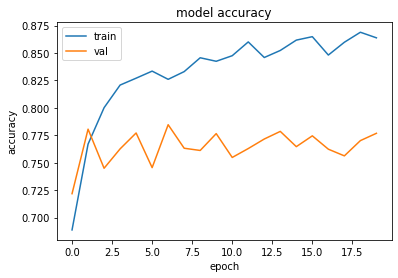

In [ ]:
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

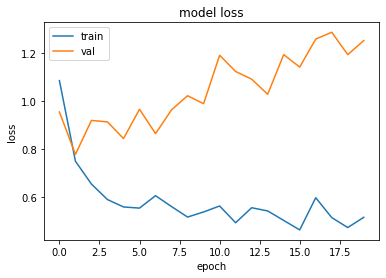

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis = 1)

Y_pred = Y_pred.astype('str')

for i in range(Y_pred.shape[0]):
  Y_pred[i] = class_names[int(Y_pred[i])]

print('Classification Report')
print(classification_report(Y_test, Y_pred, target_names=class_names))

Classification Report
                 precision    recall  f1-score   support

          Bread       0.71      0.75      0.73       368
  Dairy product       0.51      0.78      0.62       148
        Dessert       0.83      0.56      0.67       500
            Egg       0.62      0.81      0.70       335
     Fried food       0.72      0.78      0.75       287
           Meat       0.84      0.82      0.83       432
  Noodles-Pasta       0.93      0.96      0.95       147
           Rice       0.93      0.90      0.91        96
        Seafood       0.90      0.76      0.82       303
           Soup       0.93      0.93      0.93       500
Vegetable-Fruit       0.94      0.90      0.92       231

       accuracy                           0.79      3347
      macro avg       0.81      0.81      0.80      3347
   weighted avg       0.81      0.79      0.79      3347

